In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [165]:
import glob
import os

d = 'C:/Users/Luke/Desktop/University of Rochester/Spring 2020/Baseball/Pitch_Tracking/*'

df_list = []
for filepath in glob.glob(d):
    if filepath.endswith('.csv'):
        df = pd.read_csv(filepath)
    else:
        df = pd.read_excel(filepath)
    df_list.append(df)

In [166]:
final_df = pd.concat(df_list, sort=True)

In [167]:
final_df.head()

,Inning,batter_number,count,date,executed,hit_miss,inning,notes,pitch_location,pitch_number,pitch_type,pitcher_name
0,NaN,NaN,NaN,Wed Feb 05 2020 19:00:00 GMT-0500 (Eastern Sta...,NaN,NaN,NaN,NaN,48.0,1,0.0,Alex Muchnick
1,NaN,NaN,NaN,Wed Feb 05 2020 19:00:00 GMT-0500 (Eastern Sta...,NaN,NaN,NaN,NaN,37.0,2,0.0,Alex Muchnick
2,NaN,NaN,NaN,Wed Feb 05 2020 19:00:00 GMT-0500 (Eastern Sta...,NaN,NaN,NaN,NaN,23.0,3,0.0,Alex Muchnick
3,NaN,NaN,NaN,Wed Feb 05 2020 19:00:00 GMT-0500 (Eastern Sta...,NaN,NaN,NaN,NaN,25.0,4,0.0,Alex Muchnick
4,NaN,NaN,NaN,Wed Feb 05 2020 19:00:00 GMT-0500 (Eastern Sta...,NaN,NaN,NaN,NaN,30.0,5,2.0,Alex Muchnick


In [168]:
ball_positions = [1,2,3,4,5,6,7,8,12,13,18,19,24,25,30,31,36,37,42,43,44,45,46,47,48]

In [169]:
final_df.shape

(1782, 12)

In [170]:
def label_strike(row,ball_positions):
 
    if row['pitch_location'] in ball_positions:
        return 0
    else:
        return 1

In [171]:
final_df['called_strike'] = final_df.apply(lambda row: label_strike(row, ball_positions),axis=1)

In [172]:
final_df['called_strike'].mean()

0.5499438832772167

In [181]:
final_df.shape

(1782, 13)

In [182]:
final_df = final_df[~final_df['date'].isnull()]

In [183]:
final_df['date'].unique()

array(['Wed Feb 05 2020 19:00:00 GMT-0500 (Eastern Standard Time)',
       'Fri Feb 07 2020 19:00:00 GMT-0500 (Eastern Standard Time)',
       'Wed Feb 12 2020 19:00:00 GMT-0500 (Eastern Standard Time)',
       'Fri Jan 10 2020 19:00:00 GMT-0500 (Eastern Standard Time)',
       'Tue Jan 14 2020 19:00:00 GMT-0500 (Eastern Standard Time)',
       'Fri Jan 17 2020 19:00:00 GMT-0500 (Eastern Standard Time)',
       'Sat Feb 01 2020 19:00:00 GMT-0500 (Eastern Standard Time)',
       'Sat Feb 08 2020 19:00:00 GMT-0500 (Eastern Standard Time)',
       'Mon Jan 27 2020 19:00:00 GMT-0500 (Eastern Standard Time)',
       'Sat Feb 01 2020 19:00:00 GMT-0500 (EST)',
       'Tue Feb 04 2020 19:00:00 GMT-0500 (Eastern Standard Time)',
       'Tue Feb 11 2020 19:00:00 GMT-0500 (Eastern Standard Time)',
       'Thu Jan 09 2020 19:00:00 GMT-0500 (Eastern Standard Time)',
       'Mon Jan 13 2020 19:00:00 GMT-0500 (Eastern Standard Time)',
       'Sun Jan 26 2020 19:00:00 GMT-0500 (Eastern Standard Time)'

In [114]:
final_df.head()

,Inning,batter_number,count,date,executed,hit_miss,inning,notes,pitch_location,pitch_number,pitch_type,pitcher_name,called_strike
0,NaN,NaN,NaN,Wed Feb 05 2020 19:00:00 GMT-0500 (Eastern Sta...,NaN,NaN,NaN,NaN,48.0,1,0.0,Alex Muchnick,0
1,NaN,NaN,NaN,Wed Feb 05 2020 19:00:00 GMT-0500 (Eastern Sta...,NaN,NaN,NaN,NaN,37.0,2,0.0,Alex Muchnick,0
2,NaN,NaN,NaN,Wed Feb 05 2020 19:00:00 GMT-0500 (Eastern Sta...,NaN,NaN,NaN,NaN,23.0,3,0.0,Alex Muchnick,1
3,NaN,NaN,NaN,Wed Feb 05 2020 19:00:00 GMT-0500 (Eastern Sta...,NaN,NaN,NaN,NaN,25.0,4,0.0,Alex Muchnick,0
4,NaN,NaN,NaN,Wed Feb 05 2020 19:00:00 GMT-0500 (Eastern Sta...,NaN,NaN,NaN,NaN,30.0,5,2.0,Alex Muchnick,0


In [184]:
final_df.to_csv('../data/feb_15_merged_data.csv')

### Strike Percentage 

In [70]:
strike_percentage = final_df.groupby('pitcher_name').mean()['called_strike']
strike_percentage= strike_percentage.sort_values()

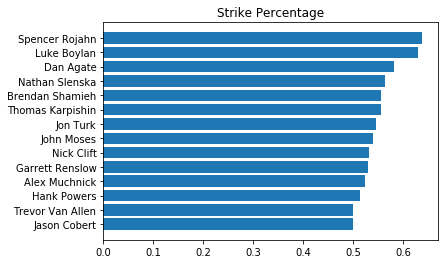

In [160]:
people = list(strike_percentage.index)
plt.barh(people, strike_percentage.values,  align='center')
plt.title('Strike Percentage')
plt.show()

### Hit & Miss Percentage 

In [185]:
final_df2 = final_df.dropna(subset = ['hit_miss'])

In [118]:
def label_binary_hit_miss(row):
    if row['hit_miss'] == 'Hit':
        return 1
    else:
        return 0

In [119]:
final_df2['hit'] = final_df2.apply(lambda row: label_binary_hit_miss(row),axis=1)

C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
hm_percentage = final_df2.groupby('pitcher_name').mean()['hit']
hm_percentage = hm_percentage.sort_values()

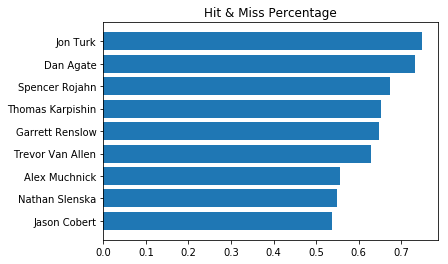

In [161]:
people = list(hm_percentage.index)
plt.barh(people, hm_percentage.values,  align='center')
plt.title('Hit & Miss Percentage')
plt.show()

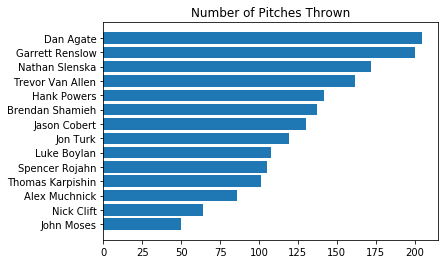

In [163]:
number_pitches = final_df['pitcher_name'].value_counts().sort_values()
plt.barh(number_pitches.index,number_pitches.values)
plt.title('Number of Pitches Thrown')
plt.show()